In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
origin = np.load('data/labels.npy')

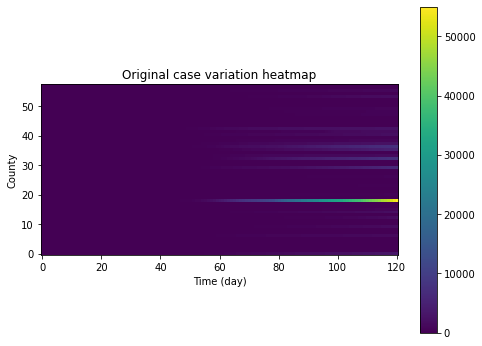

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(origin.transpose(), interpolation='none', origin="lower")
plt.title('Original case variation heatmap')
plt.xlabel('Time (day)')
plt.ylabel('County')
plt.colorbar()
plt.show()

In [4]:
truth = np.load('results/truth.npy').squeeze()
dkfn = np.load('results/preds_dkfn.npy').squeeze()
gclstm = np.load('results/preds_gclstm.npy').squeeze()
lstm = np.load('results/preds_lstm.npy').squeeze()
nedkfn = np.load('results/preds_nedkfn.npy').squeeze()
truth.shape

(108, 58)

In [5]:
# xt = {}
# for i in range(truth.shape[0]):
#     xt[i] = i+10
xx = np.linspace(0, truth.shape[0], 7, dtype=int)
xt = np.linspace(10, truth.shape[0]+9, 7, dtype=int)

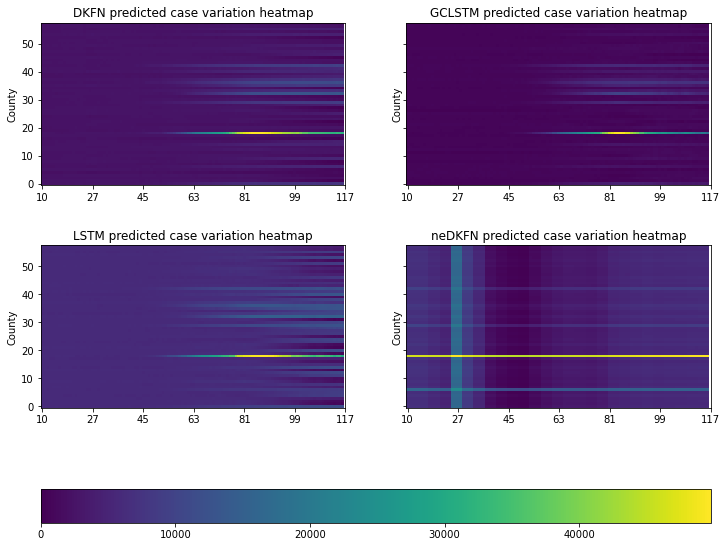

In [7]:
f, axs = plt.subplots(2, 2, sharey=True, figsize=(12,10))
ax2, ax3, ax4, ax5 = axs[0][0], axs[0][1], axs[1][0], axs[1][1]
# ground truth
cb = ax2.imshow(truth.transpose(), interpolation='none', origin="lower")
# ax1.set_title('Ground truth case variation heatmap')
# ax1.set_xlabel('Time (day)')
# ax1.set_ylabel('County')
# ax1.set_xticks(xx)
# ax1.set_xticklabels(xt)

# dkfn
ax2.imshow(dkfn.transpose(), interpolation='none', origin="lower")
ax2.set_title('DKFN predicted case variation heatmap')
ax2.set_ylabel('County')
ax2.set_xticks(xx)
ax2.set_xticklabels(xt)

# gclstm
ax3.imshow(gclstm.transpose(), interpolation='none', origin="lower")
ax3.set_title('GCLSTM predicted case variation heatmap')
ax3.set_ylabel('County')
ax3.set_xticks(xx)
ax3.set_xticklabels(xt)

# lstm
ax4.imshow(lstm.transpose(), interpolation='none', origin="lower")
ax4.set_title('LSTM predicted case variation heatmap')
ax4.set_ylabel('County')
ax4.set_xticks(xx)
ax4.set_xticklabels(xt)

# nedkfn
ax5.imshow(nedkfn.transpose(), interpolation='none', origin="lower")
ax5.set_title('neDKFN predicted case variation heatmap')
ax5.set_ylabel('County')
ax5.set_xticks(xx)
ax5.set_xticklabels(xt)
f.colorbar(cb, ax=axs, orientation='verticle', fraction=.1)
plt.show()

In [57]:
np.argmax(origin)/58

120.3103448275862

In [8]:
ldkfn = np.load('results/loss_dkfn.npy')
lgclstm = np.load('results/loss_gclstm.npy')
llstm = np.load('results/loss_lstm.npy')
lnedkfn = np.load('results/loss_nedkfn.npy')
ldkfn.shape

(100,)

In [50]:
llstm[0]

0.0028812794

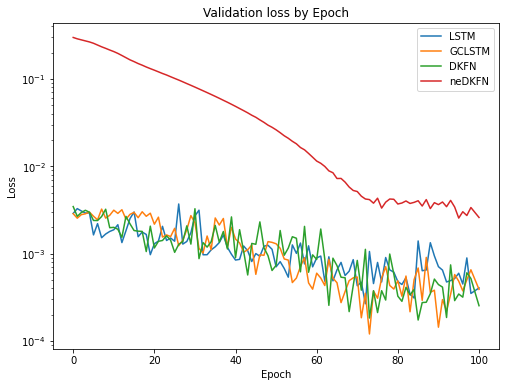

In [13]:
x = np.linspace(0, 100, 100, dtype=int)
plt.figure(figsize=(8, 6))
plt.semilogy(x, llstm, label="LSTM")
plt.semilogy(x, lgclstm, label="GCLSTM")
plt.semilogy(x, ldkfn, label="DKFN")
plt.semilogy(x, lnedkfn, label="neDKFN")
plt.title('Validation loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()